In [1]:
from google.colab import files
uploaded = files.upload()

Saving clean_matches_stats_only.csv to clean_matches_stats_only.csv


# Hypothesis Testing: Home Advantage in Goals

This Python script is part of a broader football match analysis project that aims to statistically examine the existence and extent of home advantage in professional football leagues. The specific focus of this module is to evaluate whether home teams score significantly more goals than away teams.

## Objective
To test the following statistical hypotheses using match-level data:

- **Null Hypothesis (H₀):** There is no significant difference in the number of goals scored by home and away teams.
- **Alternative Hypothesis (H₁):** Home teams score significantly more goals than away teams.

## Methodology
- A **paired t-test** is conducted to compare the mean number of goals scored by home and away teams within the same matches.
- Visualizations include:
  - A histogram comparing goal distributions
  - A boxplot illustrating central tendency and spread
  - A histogram showing the distribution of goal differences (home - away)

## Input
- CSV file: `clean_matches_stats_only.csv`  
  The dataset is expected to include, at minimum, the following columns:
  - `home_goals`
  - `away_goals`

## Output
- Test statistics and p-values printed to the console
- Generated figures saved as:
  - `goals_hypothesis_test.png`
  - `goal_difference_distribution.png`

## Interpretation
If the p-value is less than the significance level (α = 0.05) and the t-statistic is positive, the null hypothesis is rejected in favor of the alternative. This would suggest that home teams score significantly more goals than away teams. Results should be interpreted in the context of the data's assumptions and limitations.



Total number of matches: 1010

--- GOAL HYPOTHESIS TEST ---
H₀: There is no significant difference in goals scored between home and away teams.
H₁: Home teams score significantly more goals than away teams.

Average goals by home teams: 1.48
Average goals by away teams: 1.34
Difference: 0.14 goals

Paired t-test results:
t-statistic: 2.3999
p-value: 0.016578

Conclusion: H₀ is rejected. Home teams score significantly more goals than away teams.


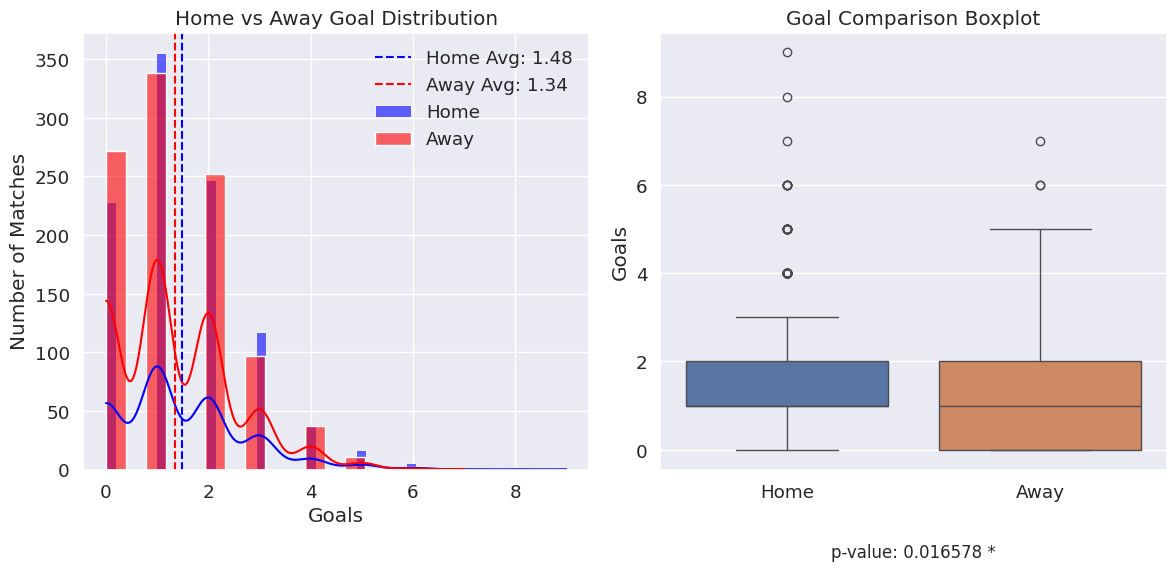

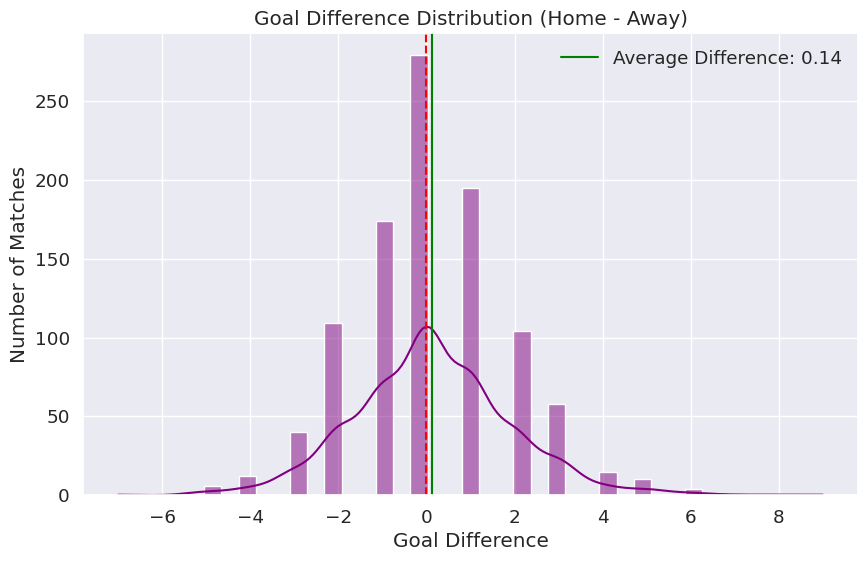


Hypothesis Test Result:
H₀ is rejected. Home teams score significantly more goals than away teams.


In [17]:
# Home Advantage: Goal Hypothesis Test

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the dataset
df = pd.read_csv('clean_matches_stats_only.csv')

# Show basic dataset information
print(f"Total number of matches: {len(df)}")

# Goal analysis hypothesis test
print("\n--- GOAL HYPOTHESIS TEST ---")
print("H₀: There is no significant difference in goals scored between home and away teams.")
print("H₁: Home teams score significantly more goals than away teams.")

# Calculate mean goals for home and away teams
home_goals_mean = df['home_goals'].mean()
away_goals_mean = df['away_goals'].mean()
diff = home_goals_mean - away_goals_mean

print(f"\nAverage goals by home teams: {home_goals_mean:.2f}")
print(f"Average goals by away teams: {away_goals_mean:.2f}")
print(f"Difference: {diff:.2f} goals")

# Apply paired t-test
t_stat, p_value = stats.ttest_rel(df['home_goals'], df['away_goals'])

print(f"\nPaired t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    if t_stat > 0:
        result = "H₀ is rejected. Home teams score significantly more goals than away teams."
    else:
        result = "H₀ is rejected. Away teams score significantly more goals than home teams."
else:
    result = "H₀ cannot be rejected. There is no significant difference in goals scored between home and away teams."

print(f"\nConclusion: {result}")

# --- Visualization Section ---

plt.figure(figsize=(12, 6))

# Histogram of goal distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='home_goals', color='blue', label='Home', kde=True, alpha=0.6)
sns.histplot(data=df, x='away_goals', color='red', label='Away', kde=True, alpha=0.6)
plt.axvline(x=home_goals_mean, color='blue', linestyle='--', label=f'Home Avg: {home_goals_mean:.2f}')
plt.axvline(x=away_goals_mean, color='red', linestyle='--', label=f'Away Avg: {away_goals_mean:.2f}')
plt.title('Home vs Away Goal Distribution')
plt.xlabel('Goals')
plt.ylabel('Number of Matches')
plt.legend()

# Boxplot comparison
plt.subplot(1, 2, 2)
data = pd.DataFrame({
    'Home': df['home_goals'],
    'Away': df['away_goals']
})
sns.boxplot(data=data)
plt.title('Goal Comparison Boxplot')
plt.ylabel('Goals')

# Significance mark
plt.text(0.5, -0.2,
         f'p-value: {p_value:.6f} {"*" if p_value < alpha else "NS"}',
         ha='center', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig('goals_hypothesis_test.png')
plt.show()

# Goal difference histogram
plt.figure(figsize=(10, 6))
df['goal_diff'] = df['home_goals'] - df['away_goals']
sns.histplot(data=df, x='goal_diff', kde=True, color='purple')
plt.axvline(x=0, color='red', linestyle='--')
plt.axvline(x=df['goal_diff'].mean(), color='green', linestyle='-',
            label=f'Average Difference: {df["goal_diff"].mean():.2f}')
plt.title('Goal Difference Distribution (Home - Away)')
plt.xlabel('Goal Difference')
plt.ylabel('Number of Matches')
plt.legend()
plt.savefig('goal_difference_distribution.png')
plt.show()

# Final output
print("\nHypothesis Test Result:")
print(result)


# Hypothesis Testing: Total Shots and Home Advantage

This Python script is part of a statistical analysis module designed to evaluate the existence of home advantage in football matches with respect to the number of total shots attempted by each team. The goal of this module is to determine whether home teams take significantly more total shots than away teams.

## Objective
To test the following statistical hypotheses using match-level data:

- **Null Hypothesis (H₀):** There is no statistically significant difference in the total number of shots taken by home and away teams.
- **Alternative Hypothesis (H₁):** Home teams take significantly more total shots than away teams.

## Methodology
- A **paired t-test** is used to compare the average number of total shots taken by home and away teams in the same match.
- Additional visualizations provide insights into the shot distribution and its relationship with match outcomes.
- The dataset is filtered to remove missing or non-numeric values to ensure statistical validity.

## Input
- CSV file: `clean_matches_stats_only.csv`
- Required columns:
  - `home_shots_total`
  - `away_shots_total`
  - `home_goals`
  - `away_goals`

## Output
- Console output of t-test results and interpretation
- Visualizations saved as:
  - `shots_hypothesis_test.png`
  - `shots_difference_distribution.png`
  - `shots_by_match_outcome.png`

## Interpretation
If the p-value is below the threshold of 0.05 and the t-statistic is positive, we reject the null hypothesis and conclude that home teams attempt significantly more total shots. This result provides statistical evidence in support of the home advantage hypothesis in terms of shot volume.


Total number of matches: 1010

--- TOTAL SHOTS HYPOTHESIS TEST ---
H₀: There is no significant difference in the total number of shots taken by home and away teams.
H₁: Home teams take significantly more shots than away teams.
Number of matches with valid shot data: 1010

Average total shots (Home): 13.66
Average total shots (Away): 11.47
Difference: 2.20 shots

Paired t-test results:
t-statistic: 7.3828
p-value: 0.000000

Conclusion: H₀ is rejected. Home teams take significantly more total shots than away teams.


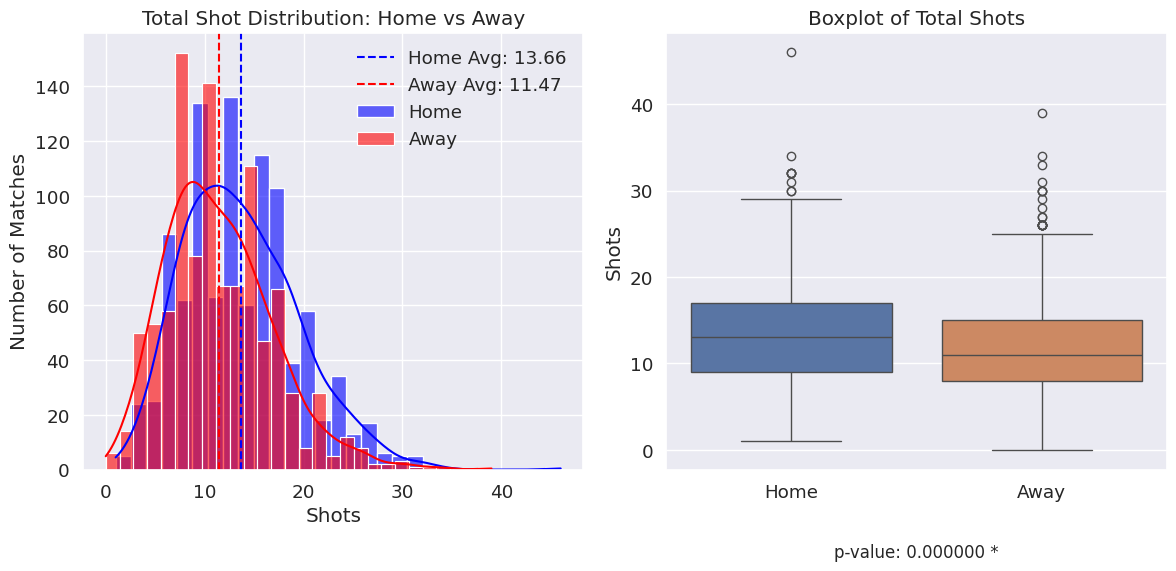

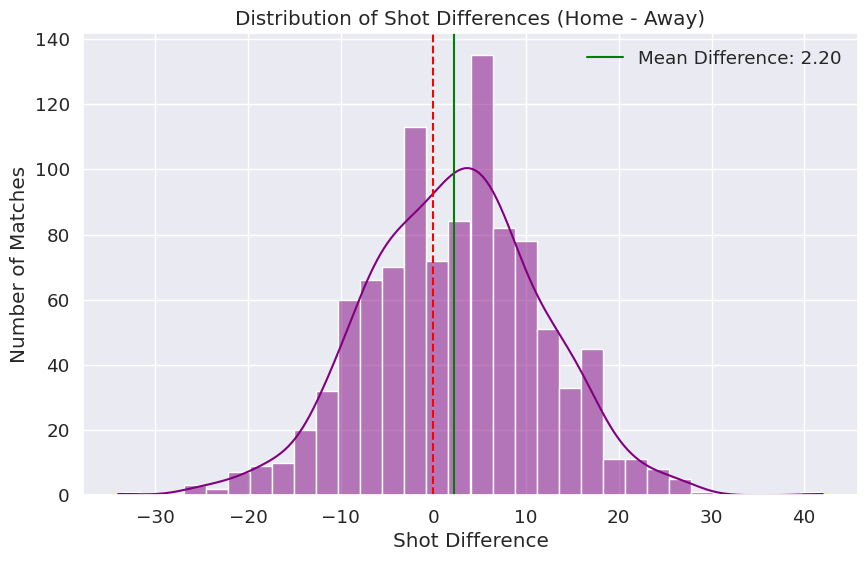

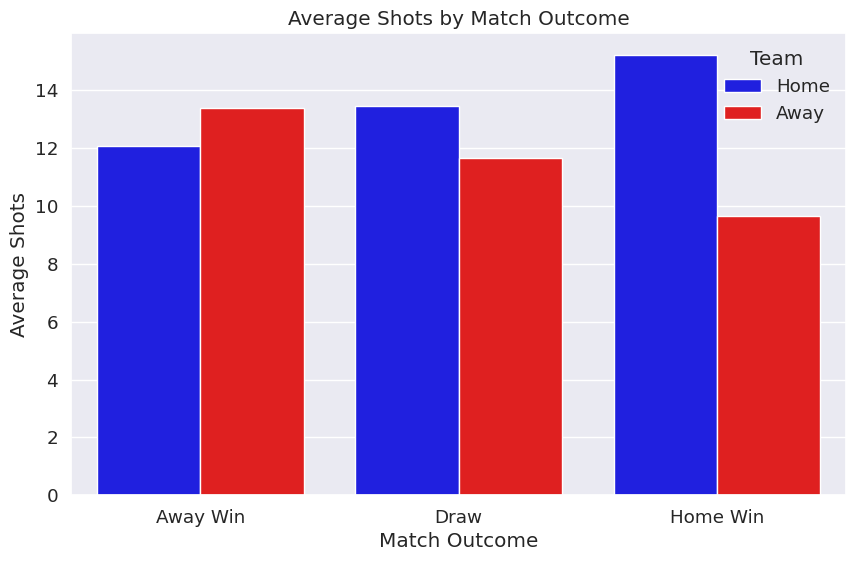


Hypothesis Test Result:
H₀ is rejected. Home teams take significantly more total shots than away teams.


In [20]:
# Hypothesis Testing: Total Shots and Home Advantage

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('clean_matches_stats_only.csv')

print(f"Total number of matches: {len(df)}")

# Hypothesis testing for total shots
print("\n--- TOTAL SHOTS HYPOTHESIS TEST ---")
print("H₀: There is no significant difference in the total number of shots taken by home and away teams.")
print("H₁: Home teams take significantly more shots than away teams.")

# Ensure shot columns are numeric
df['home_shots_total'] = pd.to_numeric(df['home_shots_total'], errors='coerce')
df['away_shots_total'] = pd.to_numeric(df['away_shots_total'], errors='coerce')

# Drop rows with missing values
shots_df = df.dropna(subset=['home_shots_total', 'away_shots_total'])
print(f"Number of matches with valid shot data: {len(shots_df)}")

# Calculate averages
home_shots_mean = shots_df['home_shots_total'].mean()
away_shots_mean = shots_df['away_shots_total'].mean()
diff = home_shots_mean - away_shots_mean

print(f"\nAverage total shots (Home): {home_shots_mean:.2f}")
print(f"Average total shots (Away): {away_shots_mean:.2f}")
print(f"Difference: {diff:.2f} shots")

# Paired t-test
t_stat, p_value = stats.ttest_rel(shots_df['home_shots_total'], shots_df['away_shots_total'])

print(f"\nPaired t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    if t_stat > 0:
        result = "H₀ is rejected. Home teams take significantly more total shots than away teams."
    else:
        result = "H₀ is rejected. Away teams take significantly more total shots than home teams."
else:
    result = "H₀ cannot be rejected. There is no significant difference in total shots between home and away teams."

print(f"\nConclusion: {result}")

# --- Visualization ---

plt.figure(figsize=(12, 6))

# Histogram of total shots
plt.subplot(1, 2, 1)
sns.histplot(data=shots_df, x='home_shots_total', color='blue', label='Home', kde=True, alpha=0.6)
sns.histplot(data=shots_df, x='away_shots_total', color='red', label='Away', kde=True, alpha=0.6)
plt.axvline(x=home_shots_mean, color='blue', linestyle='--', label=f'Home Avg: {home_shots_mean:.2f}')
plt.axvline(x=away_shots_mean, color='red', linestyle='--', label=f'Away Avg: {away_shots_mean:.2f}')
plt.title('Total Shot Distribution: Home vs Away')
plt.xlabel('Shots')
plt.ylabel('Number of Matches')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
data = pd.DataFrame({
    'Home': shots_df['home_shots_total'],
    'Away': shots_df['away_shots_total']
})
sns.boxplot(data=data)
plt.title('Boxplot of Total Shots')
plt.ylabel('Shots')

plt.text(0.5, -0.2,
         f'p-value: {p_value:.6f} {"*" if p_value < alpha else "NS"}',
         ha='center', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig('shots_hypothesis_test.png')
plt.show()

# Shot difference distribution
plt.figure(figsize=(10, 6))
shots_df['shots_diff'] = shots_df['home_shots_total'] - shots_df['away_shots_total']
sns.histplot(data=shots_df, x='shots_diff', kde=True, color='purple')
plt.axvline(x=0, color='red', linestyle='--')
plt.axvline(x=shots_df['shots_diff'].mean(), color='green', linestyle='-',
            label=f'Mean Difference: {shots_df["shots_diff"].mean():.2f}')
plt.title('Distribution of Shot Differences (Home - Away)')
plt.xlabel('Shot Difference')
plt.ylabel('Number of Matches')
plt.legend()
plt.savefig('shots_difference_distribution.png')
plt.show()

# Match outcome and average shots
shots_df['outcome'] = np.where(shots_df['home_goals'] > shots_df['away_goals'], 'Home Win',
                      np.where(shots_df['home_goals'] < shots_df['away_goals'], 'Away Win', 'Draw'))

plt.figure(figsize=(10, 6))
shot_by_outcome = shots_df.groupby('outcome').agg({
    'home_shots_total': 'mean',
    'away_shots_total': 'mean'
}).reset_index()

shot_data = pd.melt(shot_by_outcome,
                   id_vars=['outcome'],
                   value_vars=['home_shots_total', 'away_shots_total'],
                   var_name='Team', value_name='Average Shots')
shot_data['Team'] = shot_data['Team'].map({'home_shots_total': 'Home',
                                           'away_shots_total': 'Away'})

sns.barplot(x='outcome', y='Average Shots', hue='Team', data=shot_data, palette=['blue', 'red'])
plt.title('Average Shots by Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Average Shots')
plt.savefig('shots_by_match_outcome.png')
plt.show()

# Final conclusion print
print("\nHypothesis Test Result:")
print(result)


# Hypothesis Testing: Shots on Target and Home Advantage

This Python script is a component of a broader statistical study investigating the concept of home advantage in football. The specific aim of this module is to evaluate whether home teams register significantly more **shots on target** compared to away teams. Additionally, the module examines differences in **shot accuracy** (i.e., the proportion of total shots that are on target).

## Objective
To test the following hypotheses:

- **Null Hypothesis (H₀):** There is no statistically significant difference in the number of shots on target between home and away teams.
- **Alternative Hypothesis (H₁):** Home teams record significantly more shots on target than away teams.

A secondary test evaluates:
- **Null Hypothesis (H₀):** There is no significant difference in **shot accuracy** between home and away teams.
- **Alternative Hypothesis (H₁):** Home teams have significantly higher shot accuracy than away teams.

## Methodology
- The analysis uses a **paired t-test** to compare:
  - Mean shots on target between home and away teams
  - Shot accuracy percentages (calculated as shots on target divided by total shots)
- Visualizations include:
  - Histograms and boxplots comparing home and away teams
  - Shot difference distributions
  - Analysis by match outcome categories

## Input
- CSV file: `clean_matches_stats_only.csv`
- Required columns:
  - `home_shots_on_target`
  - `away_shots_on_target`
  - `home_shots_total`
  - `away_shots_total`
  - `home_goals`
  - `away_goals`

## Output
- Printed statistical results for t-tests
- Graphical outputs saved as:
  - `shots_on_target_hypothesis_test.png`
  - `shots_on_target_difference_distribution.png`
  - `shots_on_target_by_match_outcome.png`
  - `shot_accuracy_comparison.png`

## Interpretation
If the p-value is below the significance threshold (α = 0.05) and the t-statistic is positive, the null hypothesis is rejected in favor of the alternative. This supports the assertion that home teams outperform away teams in terms of shots on target and/or shot accuracy. Conclusions should be contextualized based on the dataset's characteristics and potential confounding factors.


Total number of matches: 1010

--- SHOTS ON TARGET HYPOTHESIS TEST ---
H₀: There is no significant difference in the number of shots on target between home and away teams.
H₁: Home teams take significantly more shots on target than away teams.
Number of matches with valid shots on target data: 1010

Average shots on target (Home): 4.68
Average shots on target (Away): 4.00
Difference: 0.69 shots

Paired t-test results:
t-statistic: 5.5678
p-value: 0.000000

Conclusion: H₀ is rejected. Home teams take significantly more shots on target than away teams.


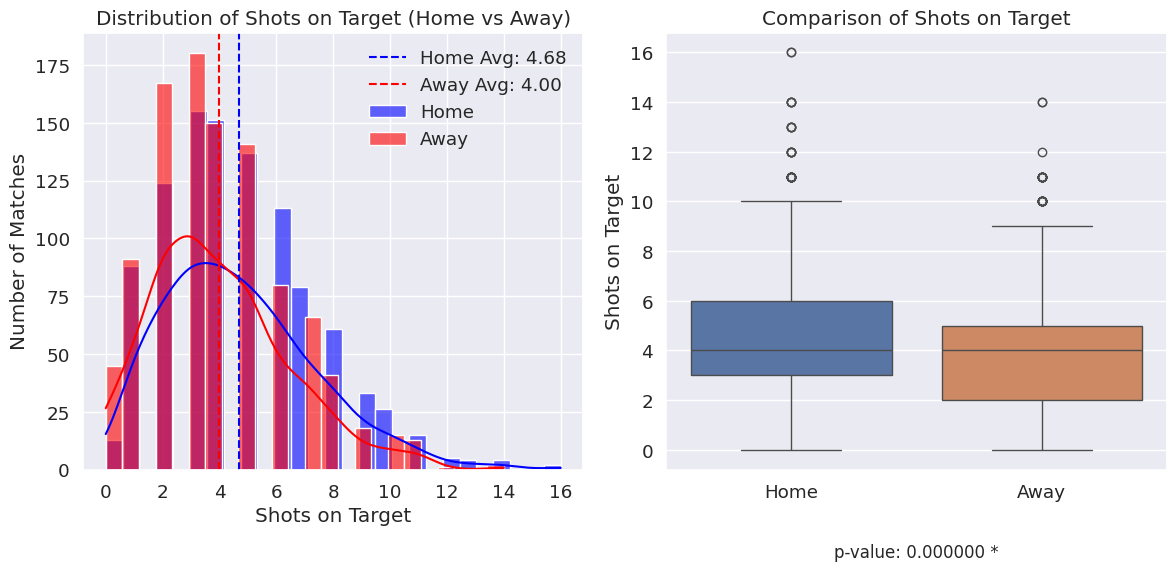

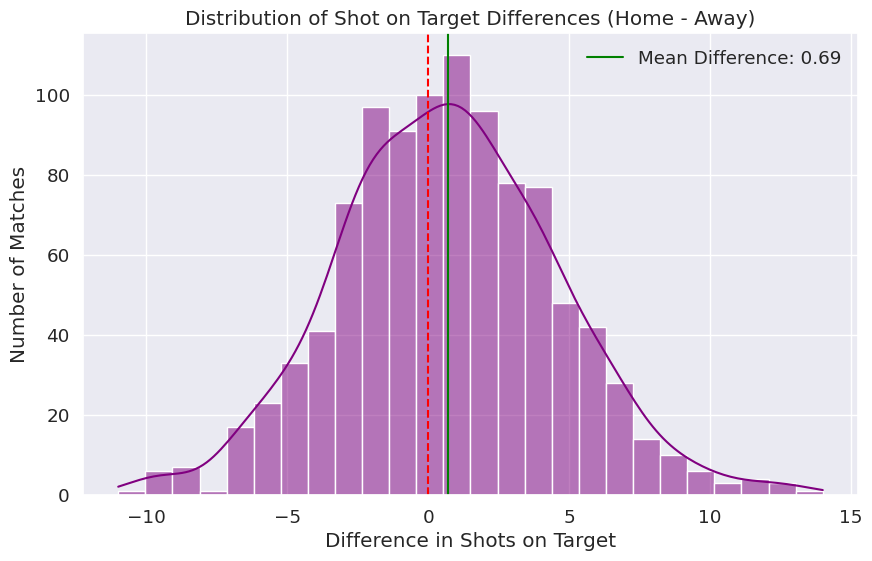

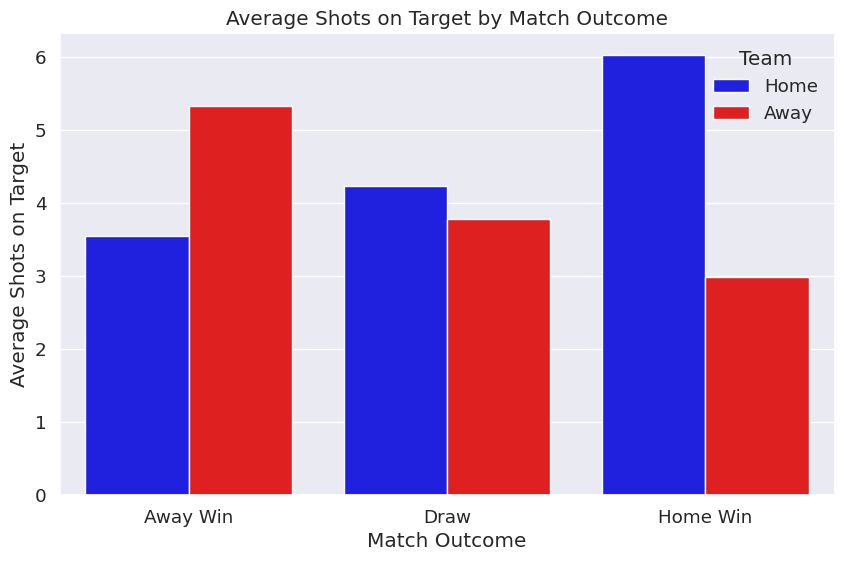


--- SHOT ACCURACY COMPARISON ---
Home average shot accuracy: 34.80%
Away average shot accuracy: 35.25%
Difference: -0.46%
t-statistic: -0.6243, p-value: 0.532546
Conclusion: No significant difference in shot accuracy.


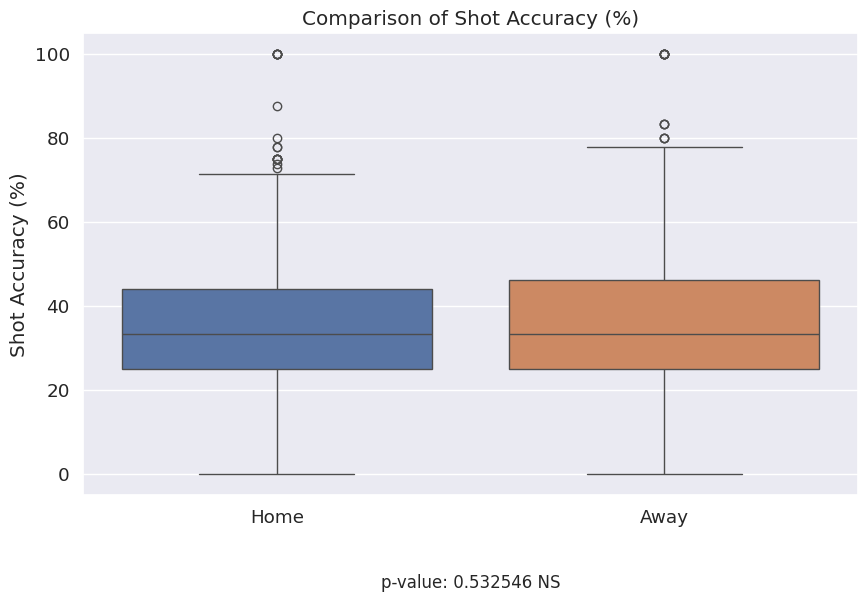


Final Result of Shots on Target Hypothesis Test:
H₀ is rejected. Home teams take significantly more shots on target than away teams.


In [21]:
# Hypothesis Testing: Shots on Target and Home Advantage

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('clean_matches_stats_only.csv')

# Display dataset size
print(f"Total number of matches: {len(df)}")

# Hypothesis declaration
print("\n--- SHOTS ON TARGET HYPOTHESIS TEST ---")
print("H₀: There is no significant difference in the number of shots on target between home and away teams.")
print("H₁: Home teams take significantly more shots on target than away teams.")

# Ensure numeric format
df['home_shots_on_target'] = pd.to_numeric(df['home_shots_on_target'], errors='coerce')
df['away_shots_on_target'] = pd.to_numeric(df['away_shots_on_target'], errors='coerce')

# Drop rows with missing values
shots_on_target_df = df.dropna(subset=['home_shots_on_target', 'away_shots_on_target'])
print(f"Number of matches with valid shots on target data: {len(shots_on_target_df)}")

# Calculate means
home_mean = shots_on_target_df['home_shots_on_target'].mean()
away_mean = shots_on_target_df['away_shots_on_target'].mean()
diff = home_mean - away_mean

print(f"\nAverage shots on target (Home): {home_mean:.2f}")
print(f"Average shots on target (Away): {away_mean:.2f}")
print(f"Difference: {diff:.2f} shots")

# Paired t-test
t_stat, p_value = stats.ttest_rel(shots_on_target_df['home_shots_on_target'],
                                  shots_on_target_df['away_shots_on_target'])

print("\nPaired t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    if t_stat > 0:
        result = "H₀ is rejected. Home teams take significantly more shots on target than away teams."
    else:
        result = "H₀ is rejected. Away teams take significantly more shots on target than home teams."
else:
    result = "H₀ cannot be rejected. No significant difference in shots on target between home and away teams."

print(f"\nConclusion: {result}")

# --- Visualization ---

plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(shots_on_target_df['home_shots_on_target'], color='blue', label='Home', kde=True, alpha=0.6)
sns.histplot(shots_on_target_df['away_shots_on_target'], color='red', label='Away', kde=True, alpha=0.6)
plt.axvline(home_mean, color='blue', linestyle='--', label=f'Home Avg: {home_mean:.2f}')
plt.axvline(away_mean, color='red', linestyle='--', label=f'Away Avg: {away_mean:.2f}')
plt.title('Distribution of Shots on Target (Home vs Away)')
plt.xlabel('Shots on Target')
plt.ylabel('Number of Matches')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
data = pd.DataFrame({
    'Home': shots_on_target_df['home_shots_on_target'],
    'Away': shots_on_target_df['away_shots_on_target']
})
sns.boxplot(data=data)
plt.title('Comparison of Shots on Target')
plt.ylabel('Shots on Target')
plt.text(0.5, -0.2,
         f'p-value: {p_value:.6f} {"*" if p_value < alpha else "NS"}',
         ha='center', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig('shots_on_target_hypothesis_test.png')
plt.show()

# Distribution of differences
plt.figure(figsize=(10, 6))
shots_on_target_df['shots_on_target_diff'] = shots_on_target_df['home_shots_on_target'] - shots_on_target_df['away_shots_on_target']
sns.histplot(shots_on_target_df['shots_on_target_diff'], kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.axvline(shots_on_target_df['shots_on_target_diff'].mean(), color='green', linestyle='-',
            label=f'Mean Difference: {shots_on_target_df["shots_on_target_diff"].mean():.2f}')
plt.title('Distribution of Shot on Target Differences (Home - Away)')
plt.xlabel('Difference in Shots on Target')
plt.ylabel('Number of Matches')
plt.legend()
plt.savefig('shots_on_target_difference_distribution.png')
plt.show()

# Match outcome relation
shots_on_target_df['outcome'] = np.where(shots_on_target_df['home_goals'] > shots_on_target_df['away_goals'], 'Home Win',
                                np.where(shots_on_target_df['home_goals'] < shots_on_target_df['away_goals'], 'Away Win', 'Draw'))

plt.figure(figsize=(10, 6))
grouped = shots_on_target_df.groupby('outcome')[['home_shots_on_target', 'away_shots_on_target']].mean().reset_index()

melted = pd.melt(grouped, id_vars='outcome',
                 value_vars=['home_shots_on_target', 'away_shots_on_target'],
                 var_name='Team', value_name='Average Shots on Target')
melted['Team'] = melted['Team'].map({
    'home_shots_on_target': 'Home',
    'away_shots_on_target': 'Away'
})

sns.barplot(x='outcome', y='Average Shots on Target', hue='Team', data=melted, palette=['blue', 'red'])
plt.title('Average Shots on Target by Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Average Shots on Target')
plt.savefig('shots_on_target_by_match_outcome.png')
plt.show()

# Shot accuracy comparison
try:
    accuracy_df = shots_on_target_df.dropna(subset=['home_shots_total', 'away_shots_total'])
    accuracy_df = accuracy_df[(accuracy_df['home_shots_total'] > 0) & (accuracy_df['away_shots_total'] > 0)]

    accuracy_df['home_shot_accuracy'] = (accuracy_df['home_shots_on_target'] / accuracy_df['home_shots_total']) * 100
    accuracy_df['away_shot_accuracy'] = (accuracy_df['away_shots_on_target'] / accuracy_df['away_shots_total']) * 100

    t_stat_acc, p_value_acc = stats.ttest_rel(accuracy_df['home_shot_accuracy'], accuracy_df['away_shot_accuracy'])

    print("\n--- SHOT ACCURACY COMPARISON ---")
    print(f"Home average shot accuracy: {accuracy_df['home_shot_accuracy'].mean():.2f}%")
    print(f"Away average shot accuracy: {accuracy_df['away_shot_accuracy'].mean():.2f}%")
    print(f"Difference: {(accuracy_df['home_shot_accuracy'].mean() - accuracy_df['away_shot_accuracy'].mean()):.2f}%")
    print(f"t-statistic: {t_stat_acc:.4f}, p-value: {p_value_acc:.6f}")

    if p_value_acc < alpha:
        if t_stat_acc > 0:
            print("Conclusion: Home teams have significantly higher shot accuracy.")
        else:
            print("Conclusion: Away teams have significantly higher shot accuracy.")
    else:
        print("Conclusion: No significant difference in shot accuracy.")

    plt.figure(figsize=(10, 6))
    acc_data = pd.DataFrame({
        'Home': accuracy_df['home_shot_accuracy'],
        'Away': accuracy_df['away_shot_accuracy']
    })
    sns.boxplot(data=acc_data)
    plt.title('Comparison of Shot Accuracy (%)')
    plt.ylabel('Shot Accuracy (%)')
    plt.text(0.5, -0.2,
             f'p-value: {p_value_acc:.6f} {"*" if p_value_acc < alpha else "NS"}',
             ha='center', fontsize=12, transform=plt.gca().transAxes)
    plt.savefig('shot_accuracy_comparison.png')
    plt.show()

except Exception as e:
    print(f"Shot accuracy analysis could not be completed: {e}")

# Final printout
print("\nFinal Result of Shots on Target Hypothesis Test:")
print(result)


# Hypothesis Testing: Disciplinary Cards and Home Advantage

This script investigates whether home teams receive significantly fewer disciplinary cards (yellow and red) compared to away teams, as a measure of home-field advantage in football matches.

## Objective

To evaluate the following hypotheses across three card types:

- **Null Hypothesis (H₀):** There is no significant difference in the number of cards received by home and away teams.
- **Alternative Hypothesis (H₁):** There is a statistically significant difference in the number of cards received by home and away teams.

Note: In this context, receiving fewer cards is interpreted as an advantage.

## Methodology

- A **paired t-test** is used to compare home and away team statistics for:
  - Total cards (yellow + red)
  - Yellow cards only
  - Red cards only
- Card differences are also analyzed with respect to match outcomes.
- Additional visualizations are produced to illustrate distributions, mean differences, and outcome-based comparisons.

## Input

- CSV file: `clean_matches_stats_only.csv`
- Required columns:
  - `home_yellow_cards`, `away_yellow_cards`
  - `home_red_cards`, `away_red_cards`
  - `home_goals`, `away_goals`

## Output

- Test results printed in the console
- Figures saved as:
  - `cards_hypothesis_test.png`
  - `cards_difference_distribution.png`
  - `cards_by_match_outcome.png`
  - `win_rate_by_card_advantage.png`

## Interpretation

A p-value less than 0.05 indicates a statistically significant difference. A **negative t-statistic** supports the notion that home teams receive **fewer cards**, implying a potential home-field disciplinary advantage.


Total number of matches: 1010
Number of matches with valid card data: 1010

--- HYPOTHESIS TEST RESULTS ---
Total Cards: H₀ is rejected. Home teams receive significantly fewer total cards than away teams.
Yellow Cards: H₀ is rejected. Home teams receive significantly fewer yellow cards.
Red Cards: H₀ is rejected. Home teams receive significantly fewer red cards.


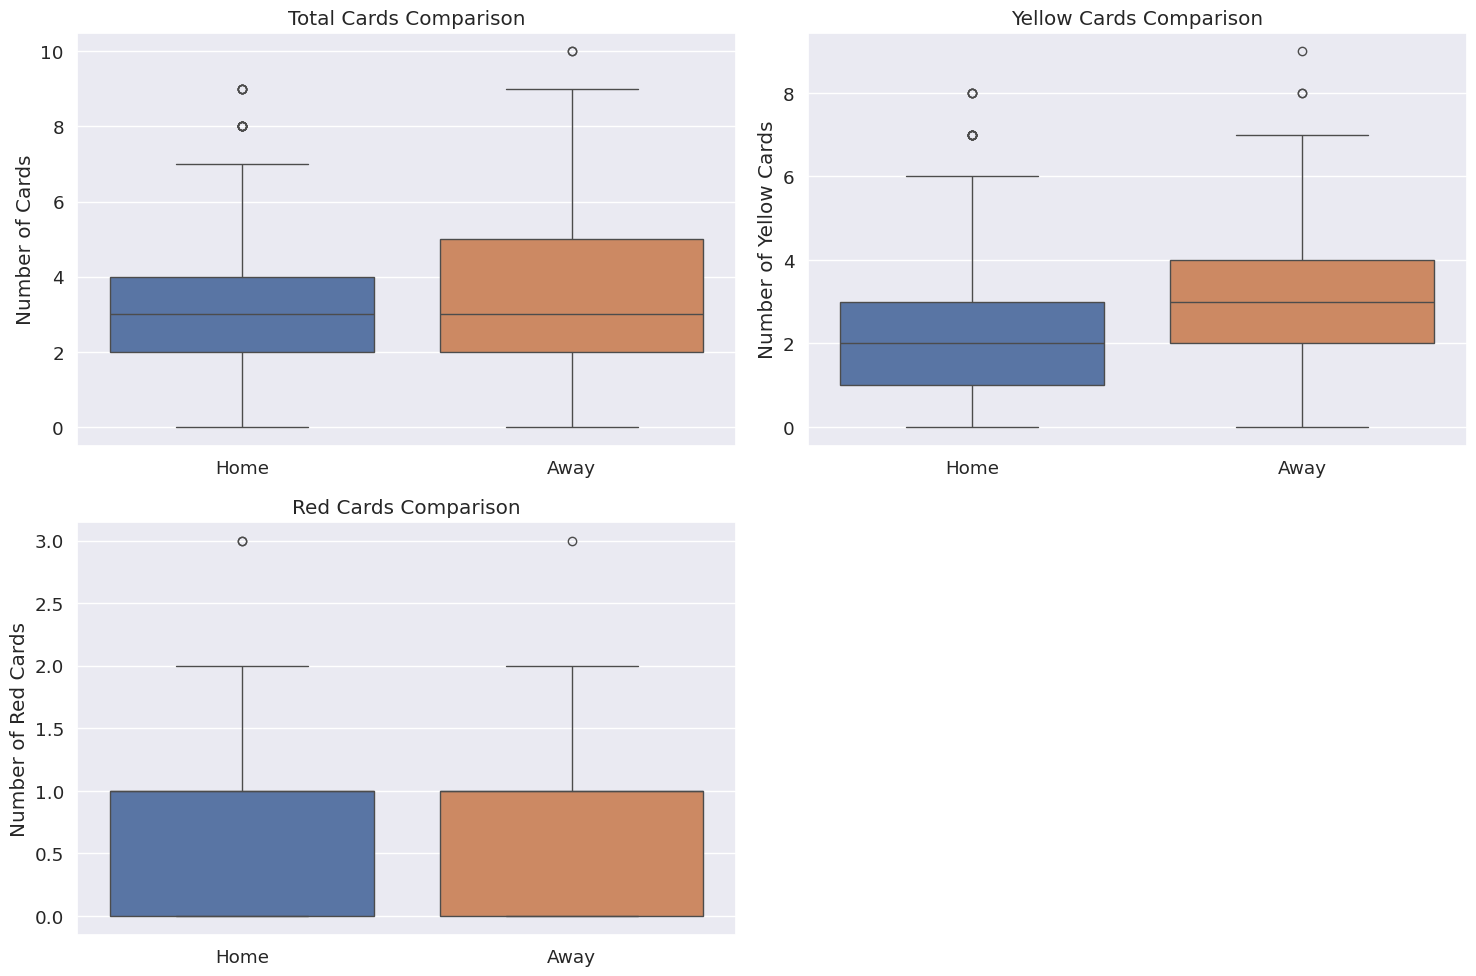

In [22]:
# Hypothesis Testing: Disciplinary Cards and Home Advantage

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('clean_matches_stats_only.csv')
print(f"Total number of matches: {len(df)}")

# Convert relevant columns to numeric
df['home_yellow_cards'] = pd.to_numeric(df['home_yellow_cards'], errors='coerce')
df['away_yellow_cards'] = pd.to_numeric(df['away_yellow_cards'], errors='coerce')
df['home_red_cards'] = pd.to_numeric(df['home_red_cards'], errors='coerce')
df['away_red_cards'] = pd.to_numeric(df['away_red_cards'], errors='coerce')

# Drop rows with missing card data
cards_df = df.dropna(subset=['home_yellow_cards', 'away_yellow_cards', 'home_red_cards', 'away_red_cards'])
print(f"Number of matches with valid card data: {len(cards_df)}")

# Calculate total cards
cards_df['home_total_cards'] = cards_df['home_yellow_cards'] + cards_df['home_red_cards']
cards_df['away_total_cards'] = cards_df['away_yellow_cards'] + cards_df['away_red_cards']

# Total cards hypothesis test
t_stat_total, p_value_total = stats.ttest_rel(cards_df['home_total_cards'], cards_df['away_total_cards'])
home_total_cards_mean = cards_df['home_total_cards'].mean()
away_total_cards_mean = cards_df['away_total_cards'].mean()

if p_value_total < 0.05:
    result_total = ("H₀ is rejected. Home teams receive significantly fewer total cards than away teams."
                    if t_stat_total < 0 else
                    "H₀ is rejected. Home teams receive significantly more total cards than away teams.")
else:
    result_total = "H₀ cannot be rejected. No significant difference in total cards."

# Yellow cards hypothesis test
t_stat_yellow, p_value_yellow = stats.ttest_rel(cards_df['home_yellow_cards'], cards_df['away_yellow_cards'])
home_yellow_cards_mean = cards_df['home_yellow_cards'].mean()
away_yellow_cards_mean = cards_df['away_yellow_cards'].mean()

diff_yellow = home_yellow_cards_mean - away_yellow_cards_mean
if p_value_yellow < 0.05:
    result_yellow = ("H₀ is rejected. Home teams receive significantly fewer yellow cards."
                     if t_stat_yellow < 0 else
                     "H₀ is rejected. Home teams receive significantly more yellow cards.")
else:
    result_yellow = "H₀ cannot be rejected. No significant difference in yellow cards."

# Red cards hypothesis test
t_stat_red, p_value_red = stats.ttest_rel(cards_df['home_red_cards'], cards_df['away_red_cards'])
home_red_cards_mean = cards_df['home_red_cards'].mean()
away_red_cards_mean = cards_df['away_red_cards'].mean()

diff_red = home_red_cards_mean - away_red_cards_mean
if p_value_red < 0.05:
    result_red = ("H₀ is rejected. Home teams receive significantly fewer red cards."
                  if t_stat_red < 0 else
                  "H₀ is rejected. Home teams receive significantly more red cards.")
else:
    result_red = "H₀ cannot be rejected. No significant difference in red cards."

# Final results
print("\n--- HYPOTHESIS TEST RESULTS ---")
print(f"Total Cards: {result_total}")
print(f"Yellow Cards: {result_yellow}")
print(f"Red Cards: {result_red}")

# Visualization - Boxplots
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=pd.DataFrame({'Home': cards_df['home_total_cards'], 'Away': cards_df['away_total_cards']}))
plt.title('Total Cards Comparison')
plt.ylabel('Number of Cards')

plt.subplot(2, 2, 2)
sns.boxplot(data=pd.DataFrame({'Home': cards_df['home_yellow_cards'], 'Away': cards_df['away_yellow_cards']}))
plt.title('Yellow Cards Comparison')
plt.ylabel('Number of Yellow Cards')

plt.subplot(2, 2, 3)
sns.boxplot(data=pd.DataFrame({'Home': cards_df['home_red_cards'], 'Away': cards_df['away_red_cards']}))
plt.title('Red Cards Comparison')
plt.ylabel('Number of Red Cards')

plt.tight_layout()
plt.savefig('cards_hypothesis_test.png')
plt.show()

# Hypothesis Testing: Passes and Home Advantage

This script evaluates whether home football teams exhibit a statistically significant advantage in terms of the number of passes made during matches, compared to away teams.

## Objective

To test the following statistical hypotheses:

- **Null Hypothesis (H₀):** There is no significant difference in the number of passes between home and away teams.
- **Alternative Hypothesis (H₁):** Home teams make significantly more passes than away teams.

Additionally, the script explores whether a higher number of passes correlates with better match outcomes and goal scoring.

## Methodology

- A **paired t-test** is used to compare average pass counts between home and away teams.
- Descriptive statistics and visualizations (histograms, boxplots, bar plots) are included.
- Relationships between pass dominance and match outcomes are analyzed using win rate comparisons.
- Correlation analysis is conducted to evaluate the linear relationship between passes and goals.

## Input

- CSV file: `clean_matches_stats_only.csv`
- Required columns:
  - `home_passes`, `away_passes`
  - `home_goals`, `away_goals`

## Output

- Statistical test results (printed to console)
- Saved visualizations:
  - `passes_hypothesis_test.png`
  - `passes_difference_distribution.png`
  - `passes_by_match_outcome.png`
  - `win_rate_by_pass_advantage.png`
  - `passes_vs_goals_correlation.png`

## Interpretation

If the p-value is below the significance level (α = 0.05), and the t-statistic is positive, the null hypothesis is rejected, indicating that home teams perform significantly more passes. The accompanying correlation plots illustrate the extent to which pass count is associated with goal scoring.


Total number of matches: 1010
Matches with valid pass data: 1010

Average passes by home teams: 449.24
Average passes by away teams: 432.33
Difference: 16.91 passes
Percentage difference: 3.91%

Paired t-test results:
t-statistic: 2.4159
p-value: 0.015875

Conclusion: H₀ is rejected. Home teams make significantly more passes.


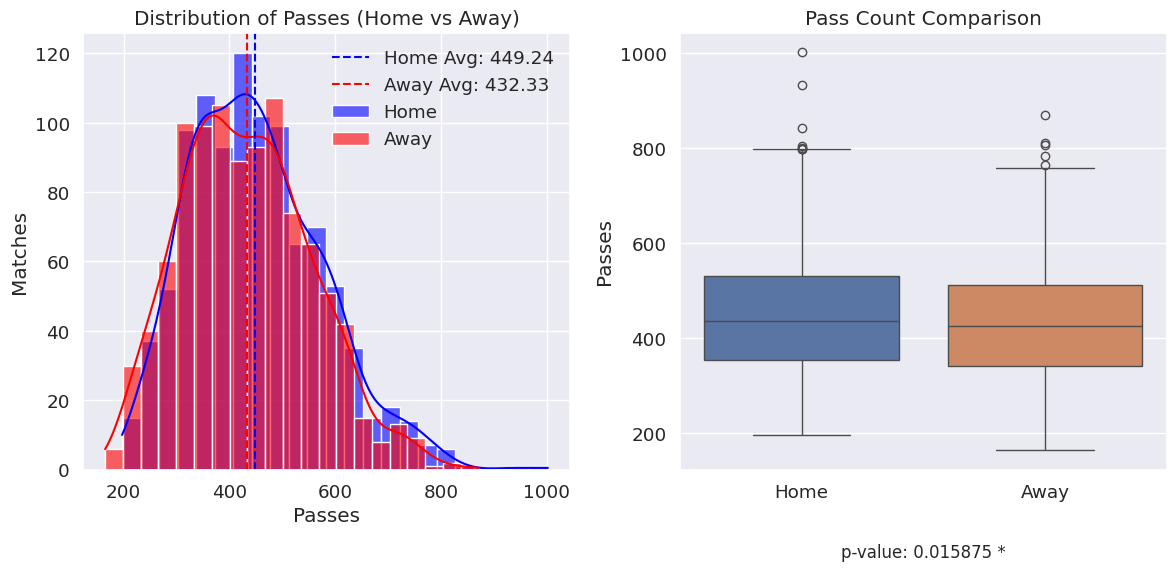

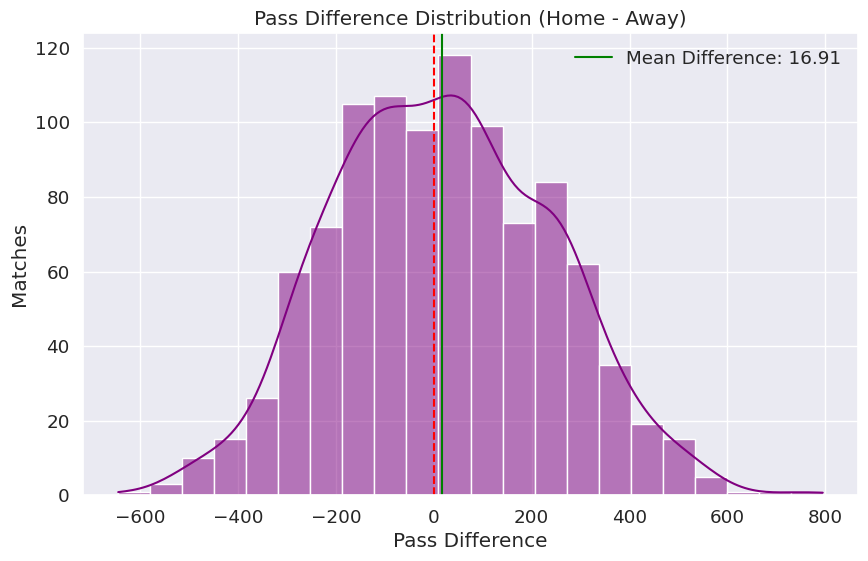

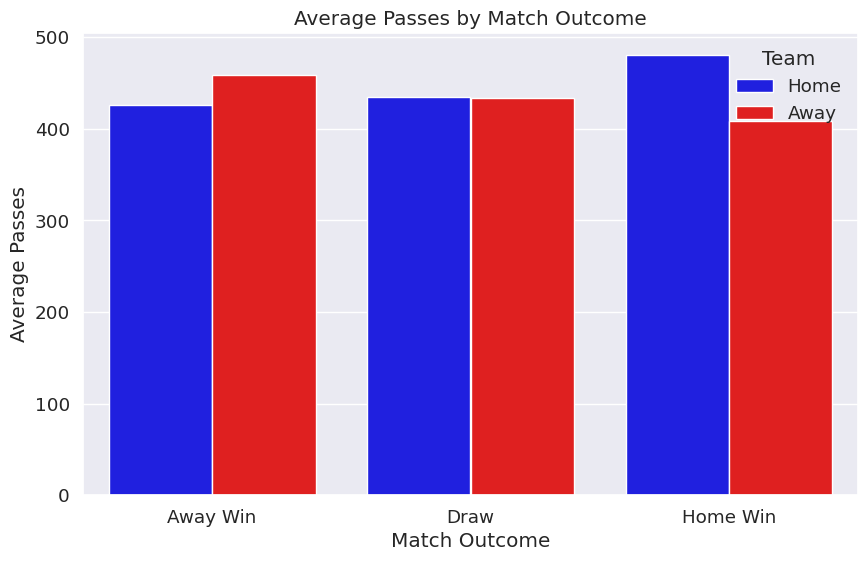


Win Rates by Pass Advantage:
match_outcome    Away Win       Draw   Home Win
pass_advantage                                 
Away            39.381443  29.896907  30.721649
Equal           50.000000  50.000000   0.000000
Home            28.680688  25.430210  45.889101


<Figure size 1200x600 with 0 Axes>

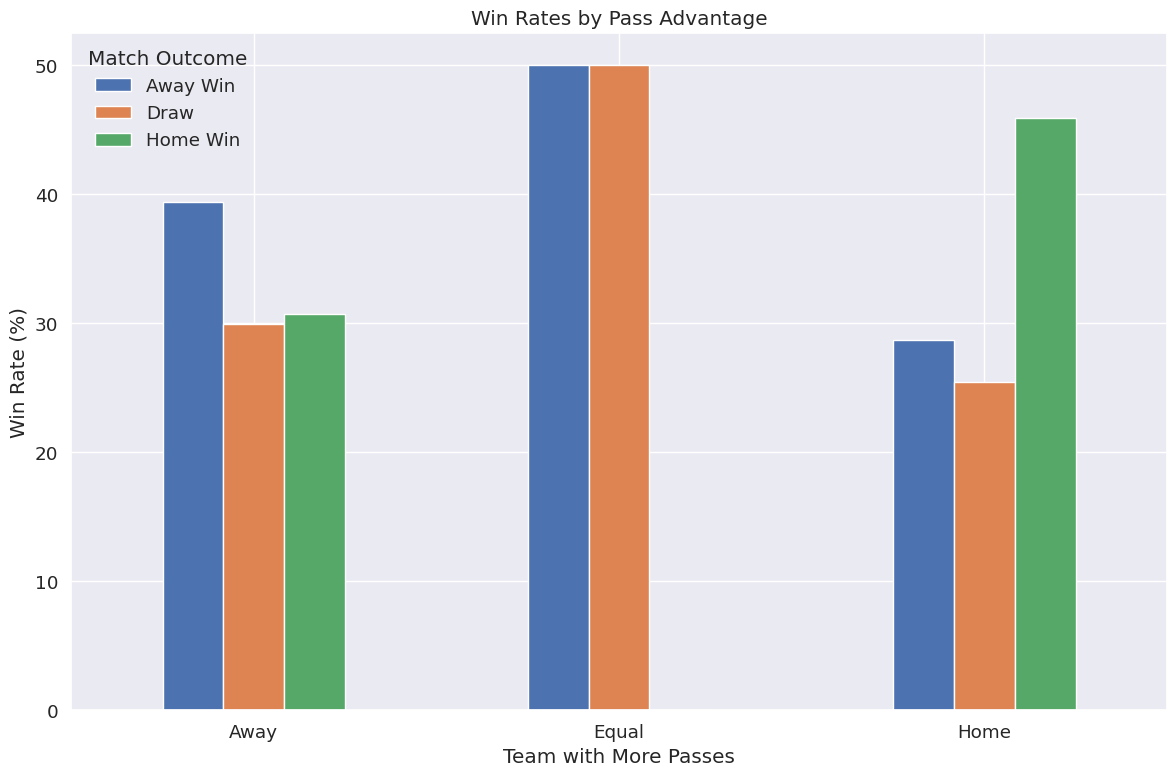


Correlation Between Passes and Goals:
Home teams: 0.2182
Away teams: 0.1995


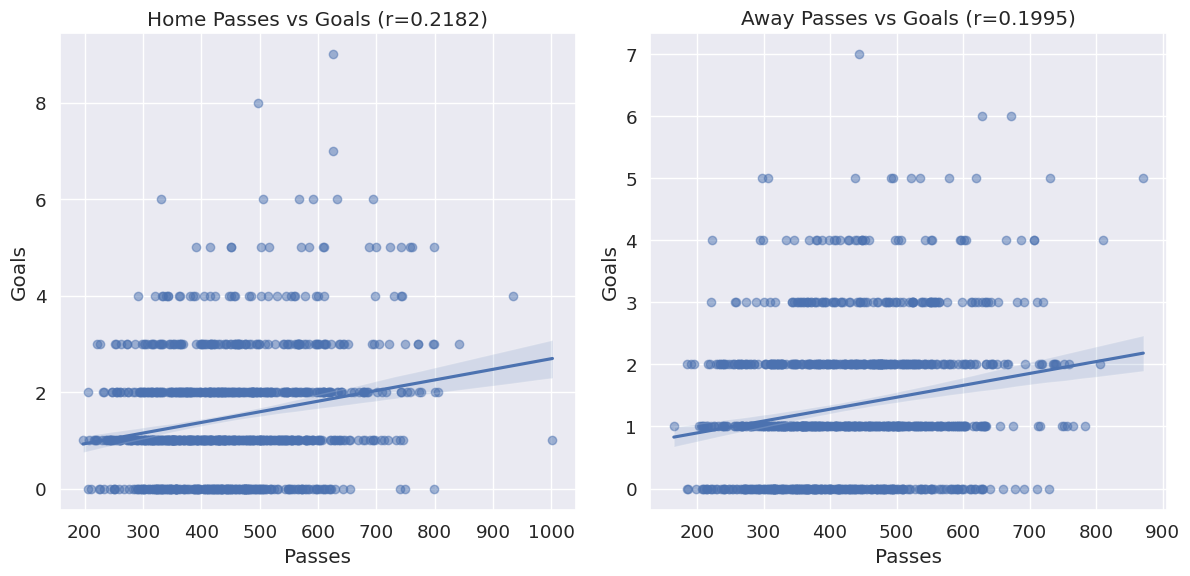


Passes Hypothesis Test Result:
H₀ is rejected. Home teams make significantly more passes.


In [23]:
# Hypothesis Testing: Passes and Home Advantage

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
df = pd.read_csv('clean_matches_stats_only.csv')
print(f"Total number of matches: {len(df)}")

# Convert pass columns to numeric
df['home_passes'] = pd.to_numeric(df['home_passes'], errors='coerce')
df['away_passes'] = pd.to_numeric(df['away_passes'], errors='coerce')

# Filter missing values
passes_df = df.dropna(subset=['home_passes', 'away_passes'])
print(f"Matches with valid pass data: {len(passes_df)}")

# Compute means
home_mean = passes_df['home_passes'].mean()
away_mean = passes_df['away_passes'].mean()
diff = home_mean - away_mean

print(f"\nAverage passes by home teams: {home_mean:.2f}")
print(f"Average passes by away teams: {away_mean:.2f}")
print(f"Difference: {diff:.2f} passes")
print(f"Percentage difference: {(diff / away_mean) * 100:.2f}%")

# Paired t-test
t_stat, p_value = stats.ttest_rel(passes_df['home_passes'], passes_df['away_passes'])

print("\nPaired t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    if t_stat > 0:
        result = "H₀ is rejected. Home teams make significantly more passes."
    else:
        result = "H₀ is rejected. Away teams make significantly more passes."
else:
    result = "H₀ cannot be rejected. No significant difference in pass counts."

print(f"\nConclusion: {result}")

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=passes_df, x='home_passes', label='Home', color='blue', kde=True, alpha=0.6)
sns.histplot(data=passes_df, x='away_passes', label='Away', color='red', kde=True, alpha=0.6)
plt.axvline(home_mean, color='blue', linestyle='--', label=f'Home Avg: {home_mean:.2f}')
plt.axvline(away_mean, color='red', linestyle='--', label=f'Away Avg: {away_mean:.2f}')
plt.title('Distribution of Passes (Home vs Away)')
plt.xlabel('Passes')
plt.ylabel('Matches')
plt.legend()

plt.subplot(1, 2, 2)
pass_data = pd.DataFrame({ 'Home': passes_df['home_passes'], 'Away': passes_df['away_passes'] })
sns.boxplot(data=pass_data)
plt.title('Pass Count Comparison')
plt.ylabel('Passes')
plt.text(0.5, -0.2, f'p-value: {p_value:.6f} {"*" if p_value < alpha else "NS"}', ha='center', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig('passes_hypothesis_test.png')
plt.show()

# Difference distribution
plt.figure(figsize=(10, 6))
passes_df['passes_diff'] = passes_df['home_passes'] - passes_df['away_passes']
sns.histplot(data=passes_df, x='passes_diff', kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.axvline(diff, color='green', linestyle='-', label=f'Mean Difference: {diff:.2f}')
plt.title('Pass Difference Distribution (Home - Away)')
plt.xlabel('Pass Difference')
plt.ylabel('Matches')
plt.legend()
plt.savefig('passes_difference_distribution.png')
plt.show()

# Match outcome based on pass advantage
passes_df['outcome'] = np.where(passes_df['home_goals'] > passes_df['away_goals'], 'Home Win',
                      np.where(passes_df['home_goals'] < passes_df['away_goals'], 'Away Win', 'Draw'))

plt.figure(figsize=(10, 6))
pass_outcome_avg = passes_df.groupby('outcome')[['home_passes', 'away_passes']].mean().reset_index()
pass_outcome_data = pd.melt(pass_outcome_avg, id_vars='outcome', value_vars=['home_passes', 'away_passes'],
                            var_name='Team', value_name='Average Passes')
pass_outcome_data['Team'] = pass_outcome_data['Team'].map({'home_passes': 'Home', 'away_passes': 'Away'})

sns.barplot(x='outcome', y='Average Passes', hue='Team', data=pass_outcome_data, palette=['blue', 'red'])
plt.title('Average Passes by Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Average Passes')
plt.savefig('passes_by_match_outcome.png')
plt.show()

# Pass advantage vs win rate
passes_df['pass_advantage'] = np.where(passes_df['home_passes'] > passes_df['away_passes'], 'Home',
                              np.where(passes_df['home_passes'] < passes_df['away_passes'], 'Away', 'Equal'))

passes_df['match_outcome'] = np.where(passes_df['home_goals'] > passes_df['away_goals'], 'Home Win',
                             np.where(passes_df['home_goals'] < passes_df['away_goals'], 'Away Win', 'Draw'))

win_rate_by_pass_advantage = pd.crosstab(passes_df['pass_advantage'], passes_df['match_outcome'], normalize='index') * 100
print("\nWin Rates by Pass Advantage:")
print(win_rate_by_pass_advantage)

plt.figure(figsize=(12, 6))
win_rate_by_pass_advantage.plot(kind='bar')
plt.title('Win Rates by Pass Advantage')
plt.xlabel('Team with More Passes')
plt.ylabel('Win Rate (%)')
plt.legend(title='Match Outcome')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('win_rate_by_pass_advantage.png')
plt.show()

# Correlation between passes and goals
home_corr = np.corrcoef(passes_df['home_passes'], passes_df['home_goals'])[0, 1]
away_corr = np.corrcoef(passes_df['away_passes'], passes_df['away_goals'])[0, 1]

print("\nCorrelation Between Passes and Goals:")
print(f"Home teams: {home_corr:.4f}")
print(f"Away teams: {away_corr:.4f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='home_passes', y='home_goals', data=passes_df, scatter_kws={'alpha': 0.5})
plt.title(f'Home Passes vs Goals (r={home_corr:.4f})')
plt.xlabel('Passes')
plt.ylabel('Goals')

plt.subplot(1, 2, 2)
sns.regplot(x='away_passes', y='away_goals', data=passes_df, scatter_kws={'alpha': 0.5})
plt.title(f'Away Passes vs Goals (r={away_corr:.4f})')
plt.xlabel('Passes')
plt.ylabel('Goals')

plt.tight_layout()
plt.savefig('passes_vs_goals_correlation.png')
plt.show()

print("\nPasses Hypothesis Test Result:")
print(result)


# Hypothesis Testing: Pass Accuracy and Home Advantage

This script investigates whether home teams in football matches achieve significantly higher pass accuracy rates than away teams. The analysis tests the existence of a home advantage from the perspective of passing efficiency.

## Objective

To evaluate the following statistical hypotheses:

- **Null Hypothesis (H₀):** There is no statistically significant difference in pass accuracy between home and away teams.
- **Alternative Hypothesis (H₁):** Home teams exhibit significantly higher pass accuracy than away teams.

## Methodology

- A **paired t-test** is applied to compare the pass accuracy percentages of home and away teams in the same matches.
- Visual analysis is performed using histograms, boxplots, and bar charts.
- Win rates are calculated based on pass accuracy advantage.
- Correlation analysis is conducted to examine the relationship between:
  - Pass accuracy and total passes
  - Pass accuracy and goals scored

## Input

- CSV File: `clean_matches_stats_only.csv`
- Required Columns:
  - `home_pass_accuracy`, `away_pass_accuracy`
  - `home_passes`, `away_passes`
  - `home_goals`, `away_goals`

## Output

- Console results from t-test and correlation analysis
- Visualizations saved as:
  - `pass_accuracy_hypothesis_test.png`
  - `pass_accuracy_difference_distribution.png`
  - `pass_accuracy_by_match_outcome.png`
  - `win_rate_by_pass_accuracy_advantage.png`
  - `passes_vs_accuracy_correlation.png`
  - `pass_accuracy_vs_goals_correlation.png`

## Interpretation

If the p-value is less than 0.05 and the t-statistic is positive, the null hypothesis is rejected in favor of the alternative. This suggests that home teams maintain higher passing efficiency. Correlation plots further clarify whether accuracy contributes to goal-scoring effectiveness or reflects broader possession dominance.


Total number of matches: 1010
Matches with valid pass accuracy data: 1010

Average pass accuracy (Home): 80.27%
Average pass accuracy (Away): 79.13%
Difference: 1.14 percentage points

Paired t-test results:
t-statistic: 3.3138
p-value: 0.000953

Conclusion: H₀ is rejected. Home teams have significantly higher pass accuracy than away teams.


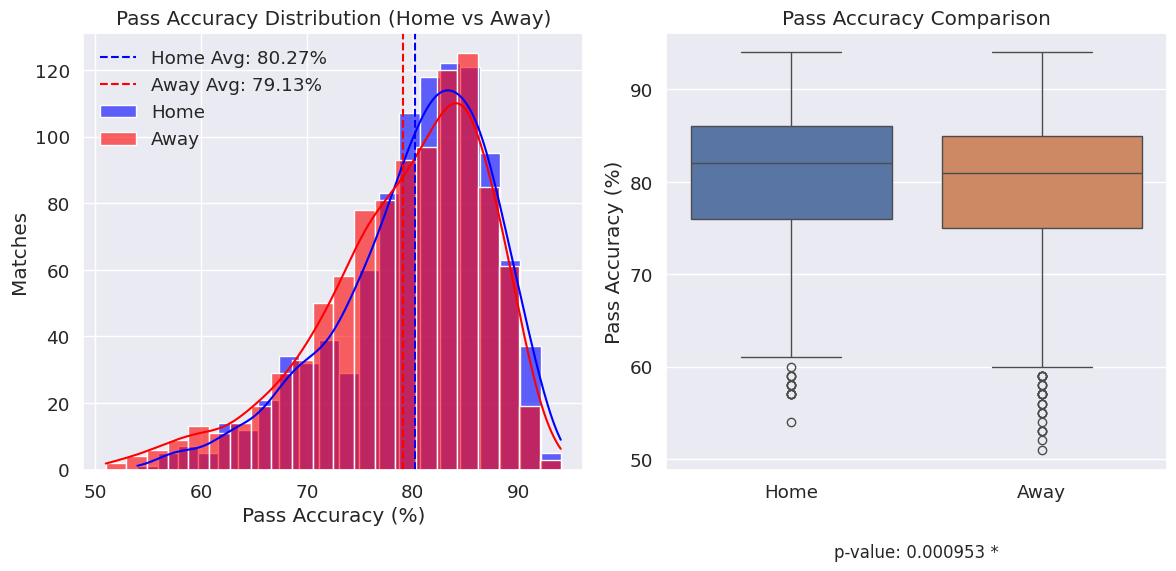

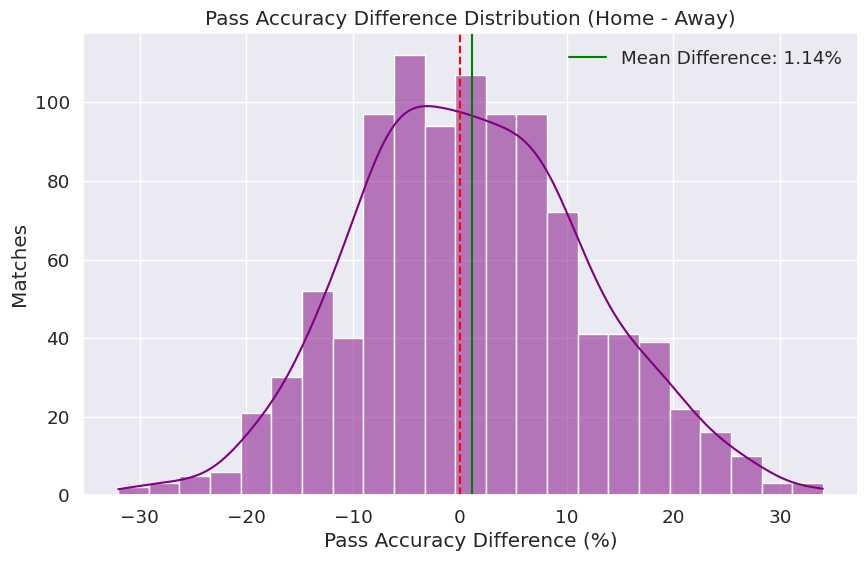


Pass Accuracy Hypothesis Test Result:
H₀ is rejected. Home teams have significantly higher pass accuracy than away teams.


In [24]:
# Hypothesis Testing: Pass Accuracy and Home Advantage

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
df = pd.read_csv('clean_matches_stats_only.csv')
print(f"Total number of matches: {len(df)}")

# Convert pass accuracy columns to numeric by removing percentage signs
df['home_pass_accuracy'] = pd.to_numeric(df['home_pass_accuracy'].str.replace('%', ''), errors='coerce')
df['away_pass_accuracy'] = pd.to_numeric(df['away_pass_accuracy'].str.replace('%', ''), errors='coerce')

# Filter missing values
accuracy_df = df.dropna(subset=['home_pass_accuracy', 'away_pass_accuracy'])
print(f"Matches with valid pass accuracy data: {len(accuracy_df)}")

# Compute means
home_mean = accuracy_df['home_pass_accuracy'].mean()
away_mean = accuracy_df['away_pass_accuracy'].mean()
diff = home_mean - away_mean

print(f"\nAverage pass accuracy (Home): {home_mean:.2f}%")
print(f"Average pass accuracy (Away): {away_mean:.2f}%")
print(f"Difference: {diff:.2f} percentage points")

# Paired t-test
t_stat, p_value = stats.ttest_rel(accuracy_df['home_pass_accuracy'], accuracy_df['away_pass_accuracy'])

print("\nPaired t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    if t_stat > 0:
        result = "H₀ is rejected. Home teams have significantly higher pass accuracy than away teams."
    else:
        result = "H₀ is rejected. Away teams have significantly higher pass accuracy than home teams."
else:
    result = "H₀ cannot be rejected. No significant difference in pass accuracy."

print(f"\nConclusion: {result}")

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=accuracy_df, x='home_pass_accuracy', label='Home', color='blue', kde=True, alpha=0.6)
sns.histplot(data=accuracy_df, x='away_pass_accuracy', label='Away', color='red', kde=True, alpha=0.6)
plt.axvline(home_mean, color='blue', linestyle='--', label=f'Home Avg: {home_mean:.2f}%')
plt.axvline(away_mean, color='red', linestyle='--', label=f'Away Avg: {away_mean:.2f}%')
plt.title('Pass Accuracy Distribution (Home vs Away)')
plt.xlabel('Pass Accuracy (%)')
plt.ylabel('Matches')
plt.legend()

plt.subplot(1, 2, 2)
acc_data = pd.DataFrame({ 'Home': accuracy_df['home_pass_accuracy'], 'Away': accuracy_df['away_pass_accuracy'] })
sns.boxplot(data=acc_data)
plt.title('Pass Accuracy Comparison')
plt.ylabel('Pass Accuracy (%)')
plt.text(0.5, -0.2, f'p-value: {p_value:.6f} {"*" if p_value < alpha else "NS"}', ha='center', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig('pass_accuracy_hypothesis_test.png')
plt.show()

# Pass accuracy difference distribution
plt.figure(figsize=(10, 6))
accuracy_df['pass_accuracy_diff'] = accuracy_df['home_pass_accuracy'] - accuracy_df['away_pass_accuracy']
sns.histplot(data=accuracy_df, x='pass_accuracy_diff', kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.axvline(diff, color='green', linestyle='-', label=f'Mean Difference: {diff:.2f}%')
plt.title('Pass Accuracy Difference Distribution (Home - Away)')
plt.xlabel('Pass Accuracy Difference (%)')
plt.ylabel('Matches')
plt.legend()
plt.savefig('pass_accuracy_difference_distribution.png')
plt.show()

print("\nPass Accuracy Hypothesis Test Result:")
print(result)

# Hypothesis Testing: Ball Possession and Home Advantage

This script evaluates whether home football teams tend to control the ball more than away teams, as a measure of home-field advantage. It tests for statistically significant differences in average possession percentages and explores how possession relates to match outcomes and goal differences.

## Objective

To test the following statistical hypotheses:

- **Null Hypothesis (H₀):** There is no significant difference in possession percentages between home and away teams.
- **Alternative Hypothesis (H₁):** Home teams have significantly higher possession percentages than away teams.

## Methodology

- A **paired t-test** is used to compare possession rates between home and away teams.
- Data is validated for completeness, and the total possession per match is checked for integrity.
- Visualization techniques include histograms, boxplots, and outcome-based bar charts.
- Correlation analysis is conducted to examine the relationships between:
  - Possession and goals scored
  - Possession advantage and goal difference
  - Possession advantage and win rate

## Input

- CSV File: `clean_matches_stats_only.csv`
- Required columns:
  - `home_possession`, `away_possession`
  - `home_goals`, `away_goals`

## Output

- Console output of descriptive statistics, t-test results, and correlation coefficients
- Saved visualizations:
  - `possession_hypothesis_test.png`
  - `possession_difference_distribution.png`
  - `possession_by_match_outcome.png`
  - `win_rate_by_possession_advantage.png`
  - `possession_vs_goals_correlation.png`
  - `possession_diff_vs_goal_diff.png`

## Interpretation

A statistically significant result (p < 0.05 and positive t-statistic) supports the hypothesis that home teams have greater ball control. Further interpretation is supported by match outcome distributions and correlations with goal-related performance.


Total number of matches: 1010
Matches with valid pass accuracy data: 1010

Average pass accuracy (Home): 80.27%
Average pass accuracy (Away): 79.13%
Difference: 1.14 percentage points

Paired t-test results:
t-statistic: 3.3138
p-value: 0.000953

Conclusion: H₀ is rejected. Home teams have significantly higher pass accuracy than away teams.


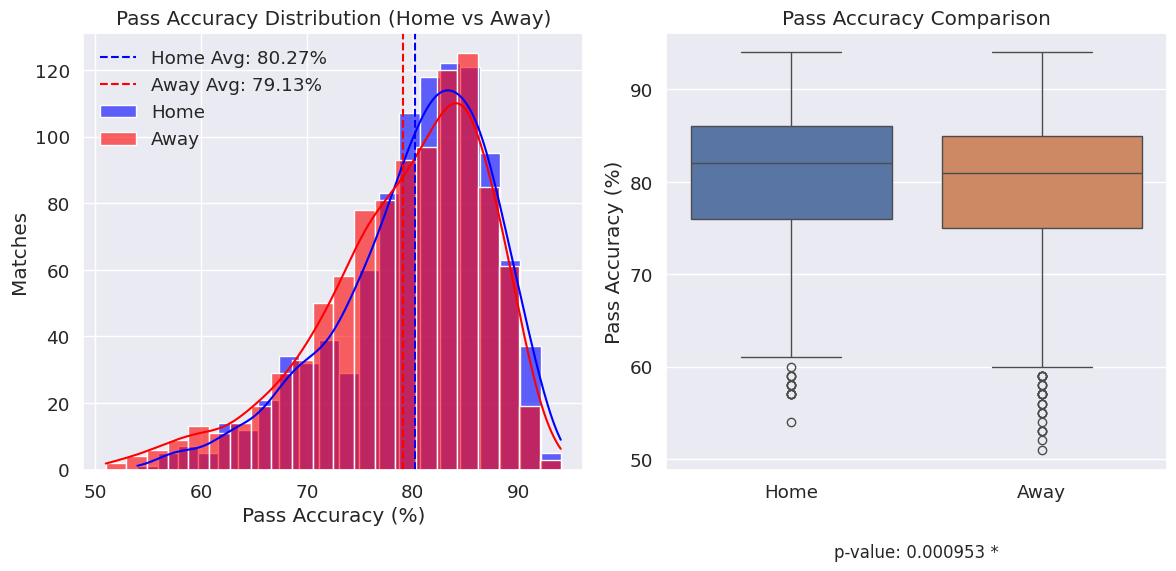

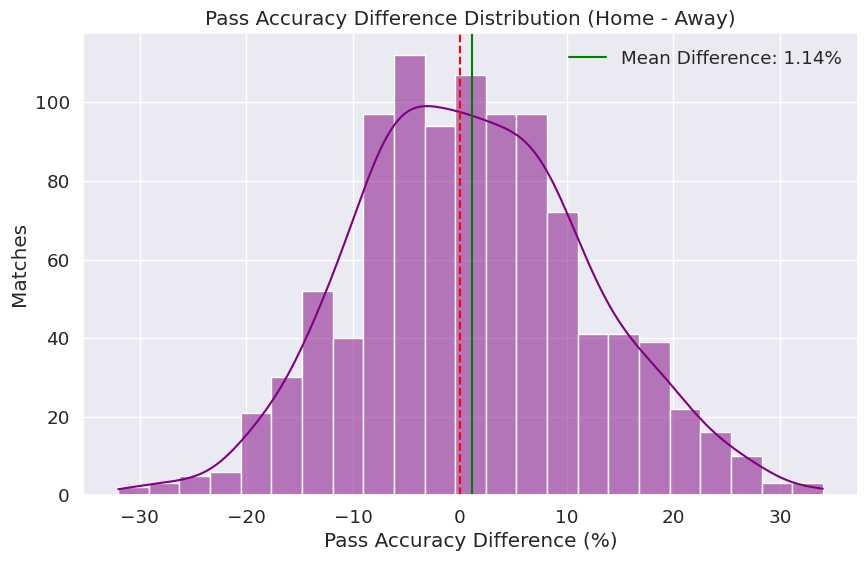


Pass Accuracy Hypothesis Test Result:
H₀ is rejected. Home teams have significantly higher pass accuracy than away teams.


In [25]:
# Hypothesis Testing: Pass Accuracy and Home Advantage

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
df = pd.read_csv('clean_matches_stats_only.csv')
print(f"Total number of matches: {len(df)}")

# Convert pass accuracy columns to numeric by removing percentage signs
df['home_pass_accuracy'] = pd.to_numeric(df['home_pass_accuracy'].str.replace('%', ''), errors='coerce')
df['away_pass_accuracy'] = pd.to_numeric(df['away_pass_accuracy'].str.replace('%', ''), errors='coerce')

# Filter missing values
accuracy_df = df.dropna(subset=['home_pass_accuracy', 'away_pass_accuracy'])
print(f"Matches with valid pass accuracy data: {len(accuracy_df)}")

# Compute means
home_mean = accuracy_df['home_pass_accuracy'].mean()
away_mean = accuracy_df['away_pass_accuracy'].mean()
diff = home_mean - away_mean

print(f"\nAverage pass accuracy (Home): {home_mean:.2f}%")
print(f"Average pass accuracy (Away): {away_mean:.2f}%")
print(f"Difference: {diff:.2f} percentage points")

# Paired t-test
t_stat, p_value = stats.ttest_rel(accuracy_df['home_pass_accuracy'], accuracy_df['away_pass_accuracy'])

print("\nPaired t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    if t_stat > 0:
        result = "H₀ is rejected. Home teams have significantly higher pass accuracy than away teams."
    else:
        result = "H₀ is rejected. Away teams have significantly higher pass accuracy than home teams."
else:
    result = "H₀ cannot be rejected. No significant difference in pass accuracy."

print(f"\nConclusion: {result}")

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=accuracy_df, x='home_pass_accuracy', label='Home', color='blue', kde=True, alpha=0.6)
sns.histplot(data=accuracy_df, x='away_pass_accuracy', label='Away', color='red', kde=True, alpha=0.6)
plt.axvline(home_mean, color='blue', linestyle='--', label=f'Home Avg: {home_mean:.2f}%')
plt.axvline(away_mean, color='red', linestyle='--', label=f'Away Avg: {away_mean:.2f}%')
plt.title('Pass Accuracy Distribution (Home vs Away)')
plt.xlabel('Pass Accuracy (%)')
plt.ylabel('Matches')
plt.legend()

plt.subplot(1, 2, 2)
acc_data = pd.DataFrame({ 'Home': accuracy_df['home_pass_accuracy'], 'Away': accuracy_df['away_pass_accuracy'] })
sns.boxplot(data=acc_data)
plt.title('Pass Accuracy Comparison')
plt.ylabel('Pass Accuracy (%)')
plt.text(0.5, -0.2, f'p-value: {p_value:.6f} {"*" if p_value < alpha else "NS"}', ha='center', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig('pass_accuracy_hypothesis_test.png')
plt.show()

# Pass accuracy difference distribution
plt.figure(figsize=(10, 6))
accuracy_df['pass_accuracy_diff'] = accuracy_df['home_pass_accuracy'] - accuracy_df['away_pass_accuracy']
sns.histplot(data=accuracy_df, x='pass_accuracy_diff', kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.axvline(diff, color='green', linestyle='-', label=f'Mean Difference: {diff:.2f}%')
plt.title('Pass Accuracy Difference Distribution (Home - Away)')
plt.xlabel('Pass Accuracy Difference (%)')
plt.ylabel('Matches')
plt.legend()
plt.savefig('pass_accuracy_difference_distribution.png')
plt.show()

print("\nPass Accuracy Hypothesis Test Result:")
print(result)
